In [23]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [24]:
LOGDIR = './graphs'

In [25]:
tf.reset_default_graph()
sess = tf.Session()

 This function will create a noisy dataset that's roughly linear, according to the equation y = mx + b + noise

In [26]:
def make_noisy_data(m=0.1, b=0.3, n=100):
    x = np.random.rand(n).astype(np.float32)
    noise = np.random.normal(scale=0.01, size=len(x))
    y = m * x + b + noise
    return x, y

In [27]:
x_train, y_train = make_noisy_data()
x_test, y_test = make_noisy_data()

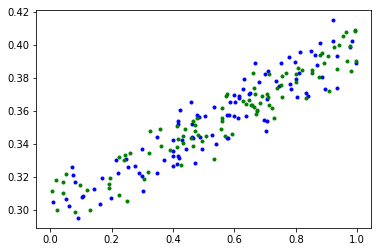

In [28]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_test, y_test, 'g.')

In [29]:
with tf.name_scope('input'):
    x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='x-input')
    y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='y-input')

In [30]:
print(x_placeholder)
print(y_placeholder)

Tensor("input/x-input:0", shape=(?,), dtype=float32)
Tensor("input/y-input:0", shape=(?,), dtype=float32)


In [31]:
with tf.name_scope('model'):
    m = tf.Variable(tf.random_normal([1]), name='m')
    b = tf.Variable(tf.random_normal([1]), name='b')
    #same as y = tf.add(tf.mul(m, x_placeholder), b), but looks nicer
    y = m * x_placeholder + b

In [32]:
print(m)
print(b)
print(y)

<tf.Variable 'model/m:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'model/b:0' shape=(1,) dtype=float32_ref>
Tensor("model/add:0", shape=(?,), dtype=float32)


In [33]:
LEARNING_RATE = 0.5

with tf.name_scope('training'):
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(y - y_placeholder))
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(loss)

In [34]:
print("loss:", loss)
print("optimizer:", optimizer)
print("train_step:", train)

loss: Tensor("training/loss/Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x000001F4A560D208>
train_step: name: "training/optimizer/GradientDescent"
op: "NoOp"
input: "^training/optimizer/GradientDescent/update_model/m/ApplyGradientDescent"
input: "^training/optimizer/GradientDescent/update_model/b/ApplyGradientDescent"



In [35]:
riter = tf.summary.FileWriter(LOGDIR)
writer.add_graph(sess.graph)

# Attach summaries to Tensors for TensorBoard visualization
tf.summary.histogram('m', m)
tf.summary.histogram('b', b)
tf.summary.scalar('loss', loss)

#  calculate our summary data when run
summary_op = tf.summary.merge_all()

In [36]:
sess.run(tf.global_variables_initializer())

In [37]:
TRAIN_STEPS = 201

for step in range(TRAIN_STEPS):
    
    # Session will run two ops:
    # - summary_op prepares summary data we'll write to disk in a moment
    # - train will use the optimizer to adjust our variables to reduce loss
    summary_result, _ = sess.run([summary_op, train], 
                                  feed_dict={x_placeholder: x_train, 
                                             y_placeholder: y_train})
    # write the summary data to disk
    writer.add_summary(summary_result, step)
    
    
    if step % 20 == 0:
        print(step, sess.run([m, b]))
    
# close the writer when we're finished using it
writer.close()

0 [array([0.19529173], dtype=float32), array([0.20596632], dtype=float32)]
20 [array([0.14138289], dtype=float32), array([0.27673593], dtype=float32)]
40 [array([0.11596578], dtype=float32), array([0.29107615], dtype=float32)]
60 [array([0.10688969], dtype=float32), array([0.29619685], dtype=float32)]
80 [array([0.10364877], dtype=float32), array([0.29802537], dtype=float32)]
100 [array([0.10249147], dtype=float32), array([0.2986783], dtype=float32)]
120 [array([0.10207821], dtype=float32), array([0.29891148], dtype=float32)]
140 [array([0.10193064], dtype=float32), array([0.29899472], dtype=float32)]
160 [array([0.10187797], dtype=float32), array([0.29902446], dtype=float32)]
180 [array([0.10185912], dtype=float32), array([0.29903507], dtype=float32)]
200 [array([0.10185243], dtype=float32), array([0.29903886], dtype=float32)]


In [38]:
print ("m: %f, b: %f" % (sess.run(m), sess.run(b)))

m: 0.101852, b: 0.299039


In [39]:
sess.run(y, feed_dict={x_placeholder: [2]})

array([0.5027437], dtype=float32)

In [40]:
sess.run(y, feed_dict={x_placeholder: [2]})

array([0.5027437], dtype=float32)

In [41]:
sess.run(y, feed_dict={x_placeholder: [1]})

array([0.4008913], dtype=float32)